In [787]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data Understanding & Cleaning

## Import Data

In [788]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


| **Nama Kolom**                          | **Penjelasan**                                                                                                                                                      |
|-----------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **hotel**                               | Hotel (H1 = Resort Hotel or H2 = City Hotel)                                                                         |
| **is_canceled**                         | Value indicating if the booking was canceled (1) or not (0)                                 |
| **lead_time**                           |Number of days that elapsed between the entering date of the booking into the PMS and the arrival date|
| **arrival_date_year**                   | Year of arrival date|
| **arrival_date_month**                  | Month of arrival date|
| **arrival_date_week_number**            | Week number of year for arrival date|
| **arrival_date_day_of_month**           | Day of arrival date|
| **stays_in_weekend_nights**             | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel|
| **stays_in_week_nights**                | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel|
| **adults**                              | Number of adults|
| **children**                            | Number of children|
| **babies**                              | Number of babies|
| **meal**                                | Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)|
| **country**                             | Country of origin. Categories are represented in the ISO 3155–3:2013 format|
| **market_segment**                      | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”|
| **distribution_channel**                | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”|
| **is_repeated_guest**                   | Value indicating if the booking name was from a repeated guest (1) or not (0)|
| **previous_cancellations**              | Number of previous bookings that were cancelled by the customer prior to the current booking|
| **previous_bookings_not_canceled**      | Number of previous bookings not cancelled by the customer prior to the current booking|
| **reserved_room_type**                  | Code of room type reserved. Code is presented instead of designation for anonymity reasons.|
| **assigned_room_type**                  | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.|
| **booking_changes**                     | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation|
| **deposit_type**                        | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.|
| **agent**                               | ID of the travel agency that made the booking|
| **company**                             | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons|
| **days_in_waiting_list**                | Number of days the booking was in the waiting list before it was confirmed to the customer|
| **customer_type**                       | Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking|
| **adr**                                 | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights|
| **required_car_parking_spaces**         | Number of car parking spaces required by the customer|
| **total_of_special_requests**           | Number of special requests made by the customer (e.g. twin bed or high floor)|
| **reservation_status**                  | Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why|
| **reservation_status_date**             | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel|


| **Nama Kolom**                          | **Penjelasan**                                                                                                                                                      |
|-----------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **hotel**                               | Jenis hotel tempat pemesanan (H1 = Resort Hotel atau H2 = City Hotel).                                                                                          |
| **is_canceled**                         | Menunjukkan apakah pemesanan dibatalkan (1 = dibatalkan, 0 = tidak dibatalkan).                                                                                   |
| **lead_time**                           | Jumlah hari antara tanggal pemesanan dan tanggal kedatangan.                                                                                                      |
| **arrival_date_year**                  | Tahun kedatangan.                                                                                                                                                 |
| **arrival_date_month**                 | Bulan kedatangan.                                                                                                                                                 |
| **arrival_date_week_number**           | Nomor minggu dalam tahun saat kedatangan.                                                                                                                        |
| **arrival_date_day_of_month**          | Hari dalam bulan saat kedatangan.                                                                                                                                 |
| **stays_in_weekend_nights**            | Jumlah malam akhir pekan (Sabtu atau Minggu) selama menginap.                                                                                                    |
| **stays_in_week_nights**               | Jumlah malam hari kerja (Senin hingga Jumat) selama menginap.                                                                                                     |
| **adults**                              | Jumlah orang dewasa dalam pemesanan.                                                                                                                             |
| **children**                            | Jumlah anak-anak dalam pemesanan.                                                                                                                                 |
| **babies**                              | Jumlah bayi dalam pemesanan.                                                                                                                                      |
| **meal**                                | Jenis makanan yang dipesan.                                                                                                                                       |
| **country**                             | Negara asal tamu.                                                                                                                                                 |
| **market_segment**                      | Segmen pasar dari mana pemesanan berasal.                                                                                                                         |
| **distribution_channel**                | Saluran distribusi yang digunakan untuk pemesanan.                                                                                                               |
| **is_repeated_guest**                   | Menunjukkan apakah tamu adalah tamu berulang.                                                                                                                    |
| **previous_cancellations**              | Jumlah pembatalan sebelumnya yang dilakukan oleh tamu.                                                                                                           |
| **previous_bookings_not_canceled**     | Jumlah pemesanan sebelumnya yang tidak dibatalkan oleh tamu.                                                                                                     |
| **reserved_room_type**                  | Tipe kamar yang dipesan.                                                                                                                                         |
| **assigned_room_type**                  | Tipe kamar yang ditugaskan.                                                                                                                                       |
| **booking_changes**                     | Jumlah perubahan yang dilakukan pada pemesanan.                                                                                                                  |
| **deposit_type**                        | Tipe deposit yang diperlukan untuk pemesanan.                                                                                                                    |
| **agent**                               | ID agen yang melakukan pemesanan.                                                                                                                                 |
| **company**                             | ID perusahaan yang melakukan pemesanan.                                                                                                                           |
| **days_in_waiting_list**               | Jumlah hari pemesanan berada dalam daftar tunggu.                                                                                                                |
| **customer_type**                       | Tipe pelanggan yang melakukan pemesanan.                                                                                                                          |
| **adr**                                 | Rata-rata tarif harian (Average Daily Rate).                                                                                                                     |
| **required_car_parking_spaces**        | Jumlah tempat parkir mobil yang dibutuhkan.                                                                                                                      |
| **total_of_special_requests**           | Jumlah permintaan khusus yang dibuat oleh tamu.                                                                                                                  |
| **reservation_status**                  | Status pemesanan.                                                                                                                                                 |
| **reservation_status_date**             | Tanggal status pemesanan.                                                                                                                                         |


In [789]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


## Data Type

In [790]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Unique Values

In [791]:
pd.set_option('display.max_colwidth', None)

listItem = []

numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    listItem.append([col, df[col].nunique(), df[col].unique()])

df_num = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Value'],
                                     data=listItem)

df_num

,Column Name,Number of Unique,Unique Value
0,is_canceled,2,"[0, 1]"
1,lead_time,479,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68, 18, 37, 12, 72, 127, 78, 48, 60, 77, 99, 118, 95, 96, 69, 45, 40, 15, 36, 43, 70, 16, 107, 47, 113, 90, 50, 93, 76, 3, 1, 10, 5, 17, 51, 71, 63, 62, 101, 2, 81, 368, 364, 324, 79, 21, 109, 102, 4, 98, 92, 26, 73, 115, 86, 52, 29, 30, 33, 32, 8, 100, 44, 80, 97, 64, 39, 34, 27, 82, 94, 110, 111, 84, 66, 104, 28, 258, 112, 65, 67, 55, 88, 54, 292, 83, 105, 280, 394, ...]"
2,arrival_date_year,3,"[2015, 2016, 2017]"
3,arrival_date_week_number,53,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]"
4,arrival_date_day_of_month,31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]"
5,stays_in_weekend_nights,17,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18, 19, 10, 14]"
6,stays_in_week_nights,35,"[0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12, 33, 20, 14, 16, 21, 13, 30, 19, 24, 40, 22, 42, 50, 25, 17, 32, 26, 18, 34, 35, 41]"
7,adults,14,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]"
8,children,5,"[0.0, 1.0, 2.0, 10.0, 3.0, nan]"
9,babies,5,"[0, 1, 2, 10, 9]"


In [792]:
pd.set_option('display.max_colwidth', None)

listItem = []

categoric_cols = df.select_dtypes(include=['object']).columns

for col in categoric_cols:
    listItem.append([col, df[col].nunique(), df[col].unique()])

df_cat = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Value'],
                                     data=listItem)

df_cat

,Column Name,Number of Unique,Unique Value
0,hotel,2,"[Resort Hotel, City Hotel]"
1,arrival_date_month,12,"[July, August, September, October, November, December, January, February, March, April, May, June]"
2,meal,5,"[BB, FB, HB, SC, Undefined]"
3,country,177,"[PRT, GBR, USA, ESP, IRL, FRA, nan, ROU, NOR, OMN, ARG, POL, DEU, BEL, CHE, CN, GRC, ITA, NLD, DNK, RUS, SWE, AUS, EST, CZE, BRA, FIN, MOZ, BWA, LUX, SVN, ALB, IND, CHN, MEX, MAR, UKR, SMR, LVA, PRI, SRB, CHL, AUT, BLR, LTU, TUR, ZAF, AGO, ISR, CYM, ZMB, CPV, ZWE, DZA, KOR, CRI, HUN, ARE, TUN, JAM, HRV, HKG, IRN, GEO, AND, GIB, URY, JEY, CAF, CYP, COL, GGY, KWT, NGA, MDV, VEN, SVK, FJI, KAZ, PAK, IDN, LBN, PHL, SEN, SYC, AZE, BHR, NZL, THA, DOM, MKD, MYS, ARM, JPN, LKA, CUB, CMR, BIH, MUS, COM, ...]"
4,market_segment,8,"[Direct, Corporate, Online TA, Offline TA/TO, Complementary, Groups, Undefined, Aviation]"
5,distribution_channel,5,"[Direct, Corporate, TA/TO, Undefined, GDS]"
6,reserved_room_type,10,"[C, A, D, E, G, F, H, L, P, B]"
7,assigned_room_type,12,"[C, A, D, E, G, F, I, B, H, P, L, K]"
8,deposit_type,3,"[No Deposit, Refundable, Non Refund]"
9,customer_type,4,"[Transient, Contract, Transient-Party, Group]"


### Penjelasan Data Kategorik

#### meal

| **Nilai** | **Penjelasan**                                                                                     |
|-----------|----------------------------------------------------------------------------------------------------|
| **BB**    | Bed and Breakfast: Tamu mendapatkan sarapan sebagai bagian dari paket pemesanan.                  |
| **FB**    | Full Board: Tamu mendapatkan semua makanan (sarapan, makan siang, dan makan malam) selama menginap. |
| **HB**    | Half Board: Tamu mendapatkan sarapan dan satu makanan lainnya (makan siang atau makan malam).     |
| **SC**    | Self Catering: Tamu tidak mendapatkan makanan, tetapi memiliki fasilitas untuk memasak sendiri.    |
| **Undefined** | Tidak ada informasi mengenai jenis makanan yang disediakan.                                      |


#### market_segment
| **Nilai**       | **Penjelasan**                                                                                     |
|------------------|----------------------------------------------------------------------------------------------------|
| **Direct**       | Pemesanan yang dilakukan langsung oleh tamu ke hotel tanpa perantara.                             |
| **Corporate**    | Pemesanan yang dilakukan oleh perusahaan untuk karyawan atau acara bisnis.                        |
| **Online TA/TO** | Pemesanan melalui agen perjalanan online atau tour operator.                                      |
| **Complementary**| Pemesanan yang dilakukan sebagai bagian dari paket atau promosi khusus.                           |
| **Groups**       | Pemesanan untuk kelompok besar, seperti rombongan atau acara.                                     |
| **Undefined**    | Kategori yang tidak terdefinisi atau tidak termasuk dalam kategori yang ada.                      |
| **Aviation**     | Pemesanan yang terkait dengan maskapai penerbangan atau perjalanan udara.                         |


In [793]:
df[df['market_segment']=='Undefined']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04


#### distrbution_channel
| **Nilai**            | **Penjelasan**                                                                                     |
|----------------------|----------------------------------------------------------------------------------------------------|
| **Direct**           | Pemesanan yang dilakukan langsung oleh tamu ke hotel tanpa perantara.                             |
| **Corporate**        | Pemesanan yang dilakukan oleh perusahaan atau organisasi untuk karyawan mereka.                    |
| **Online TA/TO**     | Pemesanan melalui agen perjalanan online atau tour operator.                                      |
| **GDS**    | Pemesanan melalui Global Distribution System, sebuah jaringan yang digunakan oleh agen perjalanan untuk memesan tiket pesawat, kamar hotel, dan layanan perjalanan lainnya.         |
| **Undefined**        | Kategori yang tidak terdefinisi atau tidak termasuk dalam kategori yang ada.                      |


In [794]:
df[df['distribution_channel']=='Undefined']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14594,Resort Hotel,0,103,2015,July,28,5,2,3,2,1.0,0,HB,PRT,Direct,Undefined,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,112.7,1,2,Check-Out,2015-07-10
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


#### deposit_type
| **Nilai**            | **Penjelasan**                                                                                     |
|----------------------|----------------------------------------------------------------------------------------------------|
| **No Deposit**       | Tidak ada uang muka yang diperlukan untuk pemesanan.                                              |
| **Refundable**       | Uang muka yang dibayarkan dapat dikembalikan jika pemesanan dibatalkan sesuai dengan kebijakan hotel. |
| **Non Refund**       | Uang muka yang dibayarkan tidak dapat dikembalikan jika pemesanan dibatalkan.                     |


#### customer_type
| **Nilai**            | **Penjelasan**                                                                                     |
|----------------------|----------------------------------------------------------------------------------------------------|
| **Transient**        | Tamu yang melakukan pemesanan untuk menginap dalam waktu singkat tanpa kontrak jangka panjang.    |
| **Contract**         | Tamu yang melakukan pemesanan berdasarkan kontrak dengan hotel, biasanya untuk perusahaan atau grup. |
| **Group**            | Tamu yang melakukan pemesanan sebagai bagian dari kelompok atau acara tertentu.                    |
| **Transient-Party**  | Tamu yang melakukan pemesanan untuk acara khusus, seperti pernikahan atau konferensi.             |


#### reservation_status
| **Nilai**        | **Penjelasan**                                                                                             |
|-----------------|---------------------------------------------------------------------------------------------------------|
| **Check-Out**   | Tamu telah check-out dari hotel dan menyelesaikan masa inapnya.                                         |
| **Canceled**    | Pemesanan telah dibatalkan oleh tamu atau hotel.                                                       |
| **No-Show**     | Tamu tidak datang ke hotel pada tanggal check-in yang dijadwalkan tanpa melakukan pembatalan sebelumnya. |


## Outliers

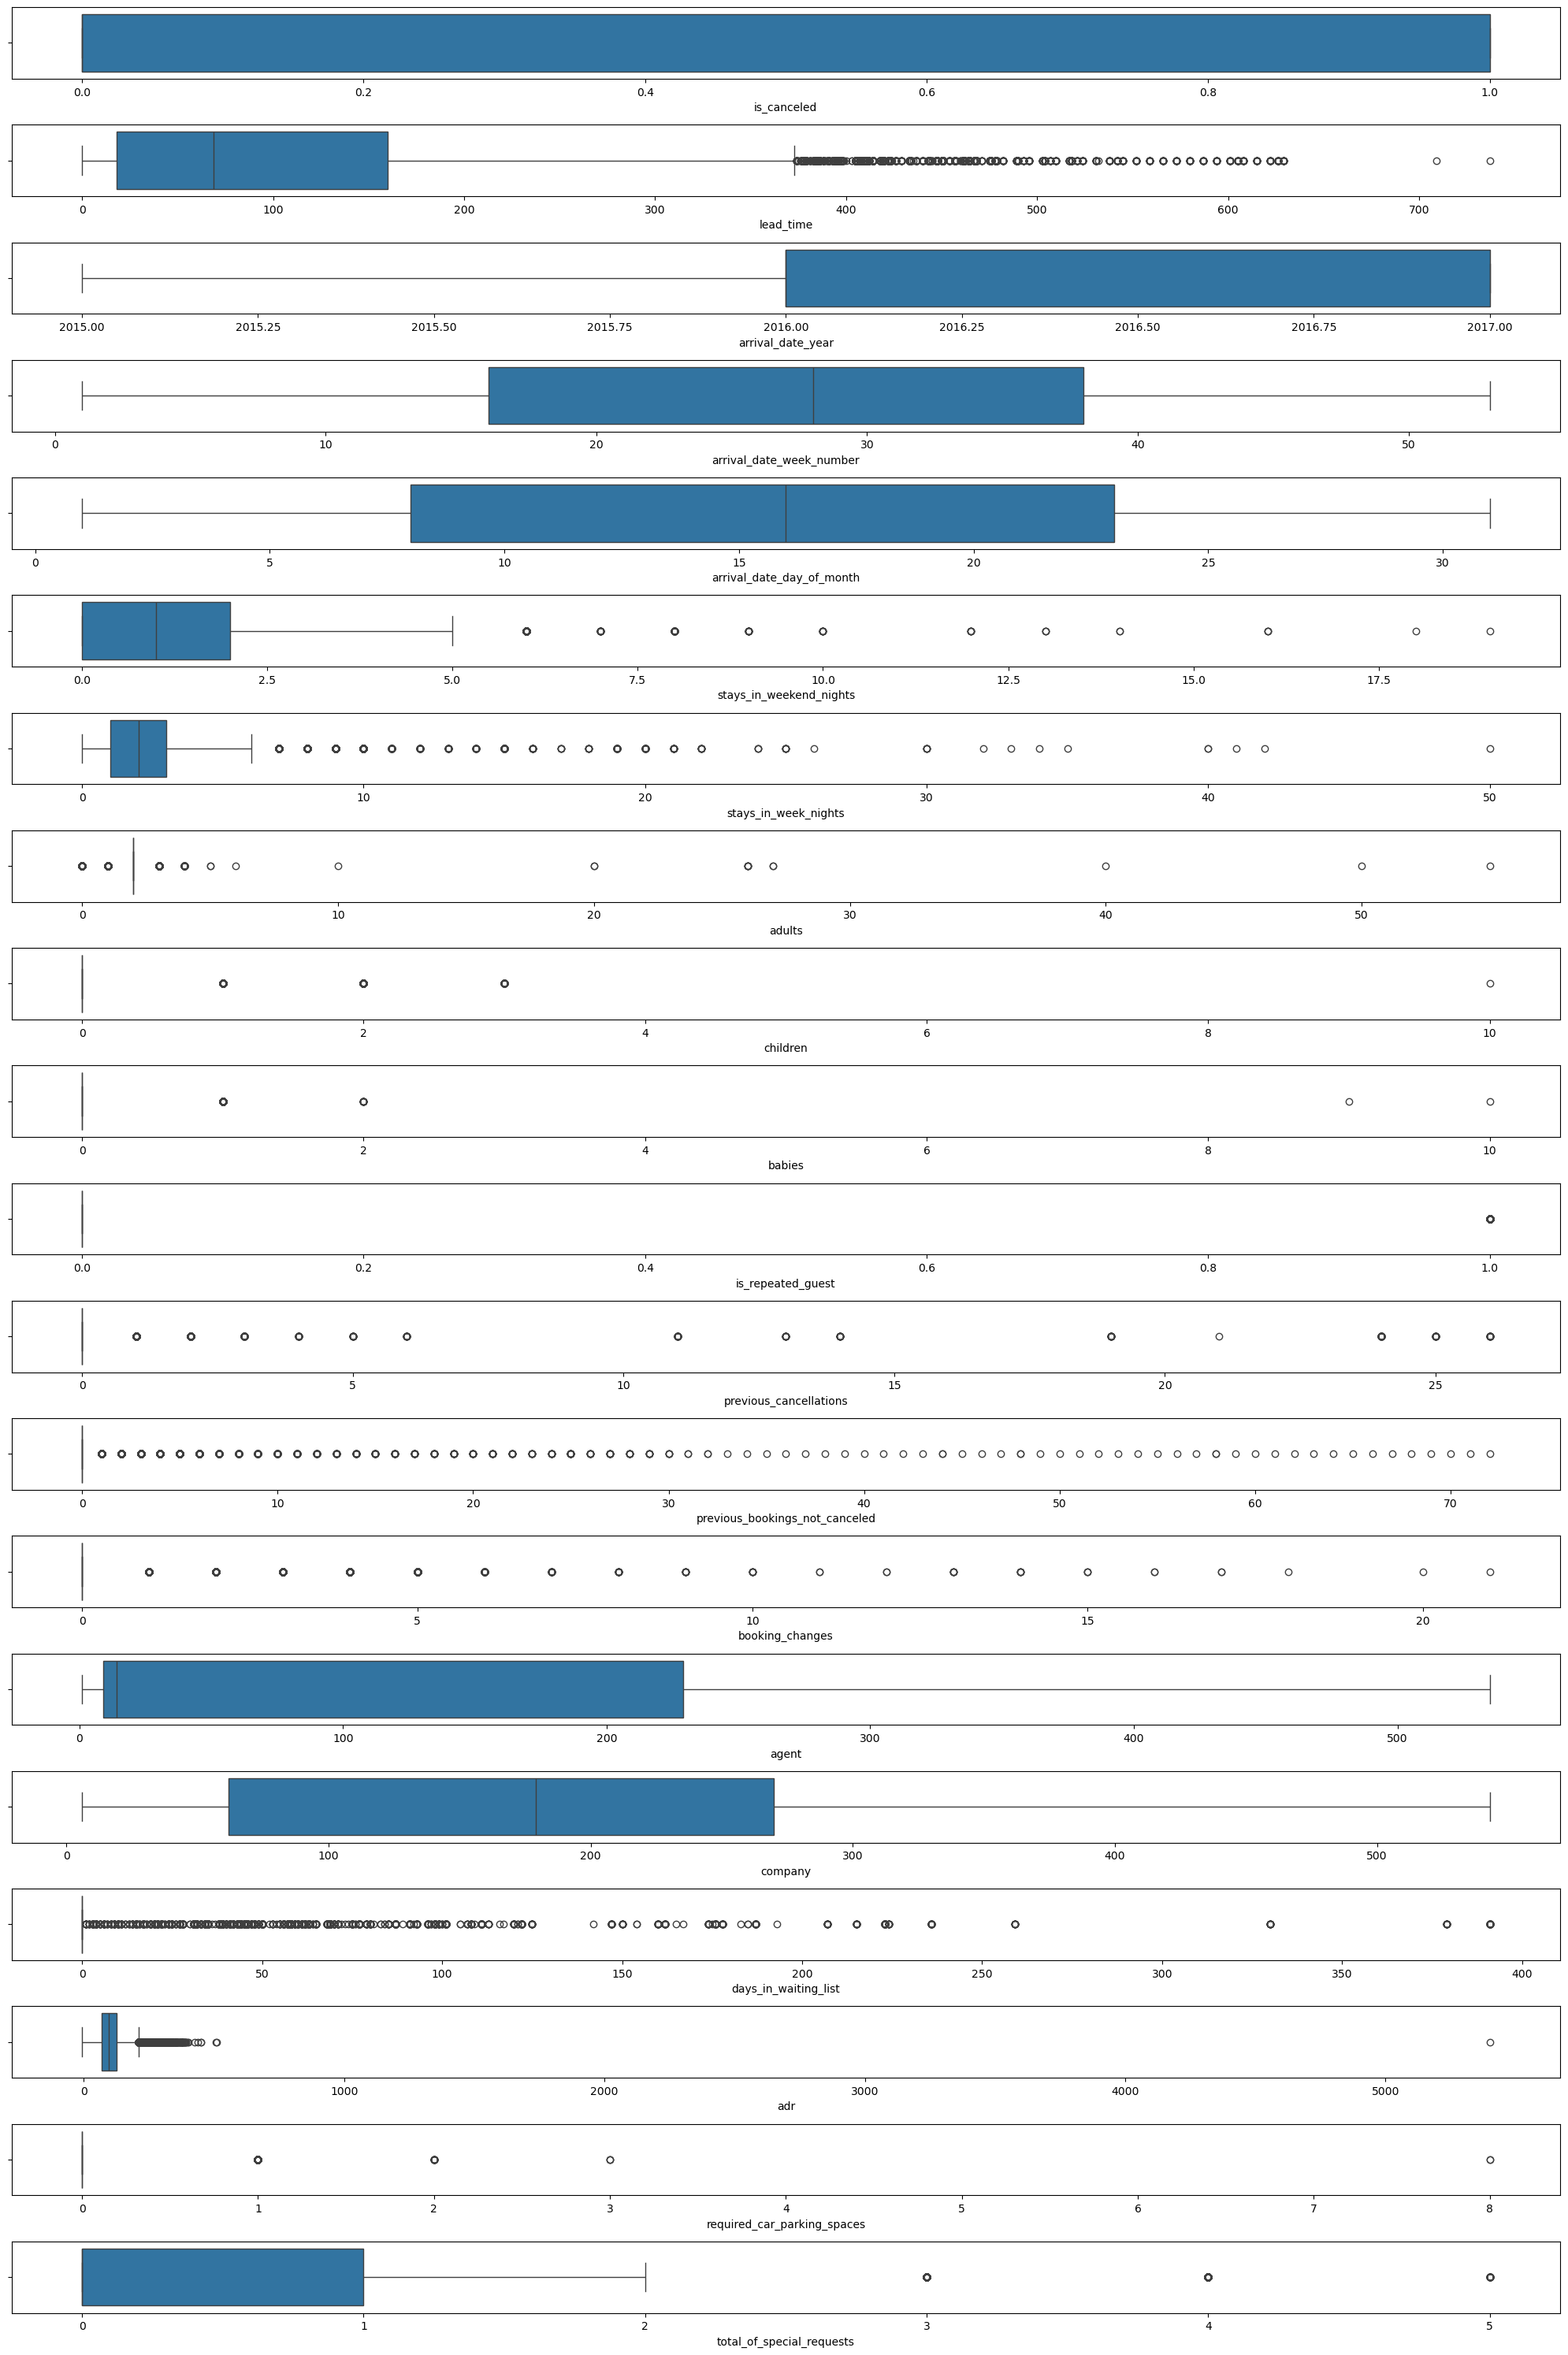

In [795]:
# Ambil kolom yang numerik
numerik = df.select_dtypes(include='number')

# Ukuran figure yang lebih proporsional
plt.figure(figsize=(20, 30))  # Lebar 20, tinggi 30
plt.subplots_adjust(hspace=0.4) # Memberi jarak antar subplot

posisi = 1
for kolom in numerik.columns:
    plt.subplot(len(numerik.columns), 1, posisi)
    sns.boxplot(x=df[kolom])
    posisi += 1

plt.tight_layout()
plt.show()


### Outliers lead_time

In [796]:
df[df['lead_time'] > 700]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
4182,Resort Hotel,0,709,2016,February,9,25,8,20,2,0.0,0,HB,GBR,Direct,Direct,0,0,0,E,E,2,No Deposit,NaN,NaN,0,Transient,68.0,0,0,Check-Out,2016-03-24


### Outliers adr

In [797]:
filtered_df = df[(df['adr'] == 0) & (df['is_canceled'] == 0)]
filtered_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
125,Resort Hotel,0,32,2015,July,27,4,0,1,4,0.0,0,FB,PRT,Complementary,Direct,0,0,0,H,H,2,No Deposit,NaN,NaN,0,Transient,0.0,0,1,Check-Out,2015-07-05
167,Resort Hotel,0,111,2015,July,28,6,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,H,0,No Deposit,240.0,NaN,0,Transient,0.0,0,2,Check-Out,2015-07-06
168,Resort Hotel,0,0,2015,July,28,6,0,0,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,H,0,No Deposit,250.0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118631,City Hotel,0,78,2017,August,34,23,0,0,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,K,7,No Deposit,98.0,NaN,0,Transient-Party,0.0,0,0,Check-Out,2017-08-23
118762,City Hotel,0,1,2017,August,34,24,0,1,2,1.0,0,BB,PRT,Complementary,Direct,0,0,0,A,D,1,No Deposit,NaN,NaN,0,Transient,0.0,0,3,Check-Out,2017-08-25
118963,City Hotel,0,1,2017,August,35,27,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2017-08-27
119102,City Hotel,0,518,2017,August,34,26,2,1,1,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,229.0,NaN,0,Transient-Party,0.0,0,0,Check-Out,2017-08-29


In [798]:
df[df['is_canceled'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [799]:
df[df['adr'] > 5000 ]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1,35,2016,March,13,25,0,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,Non Refund,12.0,NaN,0,Transient,5400.0,0,0,Canceled,2016-02-19


Dengan adr sebesar 5400 dan hanya menginap 1 malam, baris 48515 dihapus karna dianggap tidak masuk akal.

In [800]:
df.drop(index=48515, inplace=True)

### Outliers stay_in_weekend_nights

In [801]:
df['stays_in_weekend_nights'].max()

19

In [802]:
df[df['stays_in_weekend_nights'] >= 15]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
9839,Resort Hotel,1,322,2017,January,2,10,16,40,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,8.0,NaN,0,Transient,25.50,0,0,Canceled,2016-10-31
14037,Resort Hotel,0,113,2015,August,31,1,18,42,1,0.0,0,HB,NaN,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,110.50,0,3,Check-Out,2015-09-30
14038,Resort Hotel,0,126,2016,July,28,5,19,50,1,0.0,0,HB,NaN,Direct,Direct,0,0,1,E,E,2,No Deposit,NaN,NaN,0,Transient,110.00,0,3,Check-Out,2016-09-12
33924,Resort Hotel,0,71,2017,January,2,10,16,40,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,196.0,NaN,0,Transient,28.79,0,0,Check-Out,2017-03-07
101794,City Hotel,0,140,2016,September,39,22,16,41,0,0.0,0,SC,GBR,Online TA,TA/TO,0,0,0,A,K,12,No Deposit,9.0,NaN,0,Transient,8.34,0,2,Check-Out,2016-11-18


### Outliers stay_in_week_nights

In [803]:
df['stays_in_week_nights'].max()

50

In [804]:
df[df['stays_in_week_nights'] >= 40 ]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
9839,Resort Hotel,1,322,2017,January,2,10,16,40,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,8.0,NaN,0,Transient,25.50,0,0,Canceled,2016-10-31
14037,Resort Hotel,0,113,2015,August,31,1,18,42,1,0.0,0,HB,NaN,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,110.50,0,3,Check-Out,2015-09-30
14038,Resort Hotel,0,126,2016,July,28,5,19,50,1,0.0,0,HB,NaN,Direct,Direct,0,0,1,E,E,2,No Deposit,NaN,NaN,0,Transient,110.00,0,3,Check-Out,2016-09-12
33924,Resort Hotel,0,71,2017,January,2,10,16,40,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,196.0,NaN,0,Transient,28.79,0,0,Check-Out,2017-03-07
101794,City Hotel,0,140,2016,September,39,22,16,41,0,0.0,0,SC,GBR,Online TA,TA/TO,0,0,0,A,K,12,No Deposit,9.0,NaN,0,Transient,8.34,0,2,Check-Out,2016-11-18


### Outliers adults

In [805]:
df['adults'].max()

55

In [806]:
df[df['adults'] >= 10]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1539,Resort Hotel,1,304,2015,September,36,3,0,3,40,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
1587,Resort Hotel,1,333,2015,September,36,5,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,96.0,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
1643,Resort Hotel,1,336,2015,September,37,7,1,2,50,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Group,0.0,0,0,Canceled,2015-01-18
1752,Resort Hotel,1,340,2015,September,37,12,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,96.0,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
1884,Resort Hotel,1,347,2015,September,38,19,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,96.0,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
1917,Resort Hotel,1,349,2015,September,39,21,1,3,27,0.0,0,HB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
1962,Resort Hotel,1,352,2015,September,39,24,1,3,27,0.0,0,HB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
2003,Resort Hotel,1,354,2015,September,39,26,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,96.0,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
2164,Resort Hotel,1,361,2015,October,40,3,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,96.0,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
2173,Resort Hotel,1,338,2015,October,41,4,2,0,55,0.0,0,HB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Group,0.0,0,0,Canceled,2015-01-02


### Outliers children

In [807]:
df['children'].max()

10.0

In [808]:
df[df['children'] >= 5]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
328,Resort Hotel,1,55,2015,July,29,12,4,10,2,10.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,2,No Deposit,8.0,NaN,0,Contract,133.16,0,1,No-Show,2015-07-12


In [809]:
df[df['babies'] >= 5]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
46619,City Hotel,0,37,2016,January,3,12,0,2,2,0.0,10,BB,PRT,Online TA,TA/TO,0,0,0,D,D,1,No Deposit,9.0,NaN,0,Transient,84.45,0,1,Check-Out,2016-01-14
78656,City Hotel,0,11,2015,October,42,11,2,1,1,0.0,9,BB,GBR,Corporate,Corporate,0,0,0,A,B,1,No Deposit,95.0,NaN,0,Transient-Party,95.00,0,0,Check-Out,2015-10-14


### Outliers previous_cancellations

In [810]:
df['previous_cancellations'].max()

26

In [811]:
df[df['previous_cancellations'] >15 ]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14779,Resort Hotel,1,275,2015,October,41,4,2,0,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,26,0,A,A,0,Non Refund,208.0,NaN,0,Transient,50.0,0,0,Canceled,2015-01-30
14780,Resort Hotel,1,275,2015,October,41,4,2,0,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,26,0,A,A,0,Non Refund,208.0,NaN,0,Transient,50.0,0,0,Canceled,2015-01-30
14781,Resort Hotel,1,275,2015,October,41,4,2,0,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,26,0,A,A,0,Non Refund,208.0,NaN,0,Transient,50.0,0,0,Canceled,2015-01-30
14782,Resort Hotel,1,275,2015,October,41,4,2,0,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,26,0,A,A,0,Non Refund,208.0,NaN,0,Transient,50.0,0,0,Canceled,2015-01-30
14783,Resort Hotel,1,275,2015,October,41,4,2,0,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,26,0,A,A,0,Non Refund,208.0,NaN,0,Transient,50.0,0,0,Canceled,2015-01-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15170,Resort Hotel,1,244,2015,September,36,2,2,5,2,0.0,0,BB,IRL,Groups,TA/TO,0,24,0,A,A,0,No Deposit,96.0,NaN,0,Transient-Party,8.0,0,0,Canceled,2015-06-17
15171,Resort Hotel,1,244,2015,September,36,2,2,5,2,0.0,0,BB,IRL,Groups,TA/TO,0,24,0,A,A,0,No Deposit,96.0,NaN,0,Transient-Party,8.0,0,0,Canceled,2015-06-17
15172,Resort Hotel,1,244,2015,September,36,2,2,5,2,0.0,0,BB,IRL,Groups,TA/TO,0,24,0,A,A,0,No Deposit,96.0,NaN,0,Transient-Party,8.0,0,0,Canceled,2015-06-17
15173,Resort Hotel,1,244,2015,September,36,2,2,5,2,0.0,0,BB,IRL,Groups,TA/TO,0,24,0,A,A,0,No Deposit,96.0,NaN,0,Transient-Party,8.0,0,0,Canceled,2015-06-17


### Outliers required_car_parking_spaces

In [812]:
df['required_car_parking_spaces'].max()

8

In [813]:
df[df['required_car_parking_spaces'] >=3 ]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
29045,Resort Hotel,0,26,2017,March,11,14,0,5,2,0.0,0,HB,AUT,Direct,Corporate,1,0,2,E,I,1,No Deposit,NaN,NaN,0,Transient-Party,40.00,8,1,Check-Out,2017-03-19
29046,Resort Hotel,0,138,2017,March,12,19,2,2,2,0.0,0,HB,AUT,Direct,Corporate,1,0,2,E,F,1,No Deposit,NaN,NaN,122,Transient-Party,80.00,8,0,Check-Out,2017-03-23
38117,Resort Hotel,0,205,2017,June,26,26,3,10,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,2,No Deposit,250.0,NaN,0,Transient,111.00,3,0,Check-Out,2017-07-09
102762,City Hotel,0,13,2016,December,50,5,1,0,1,0.0,0,BB,NLD,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,96.00,3,0,Check-Out,2016-12-06
110812,City Hotel,0,30,2017,April,17,29,2,1,2,0.0,0,SC,ESP,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient-Party,153.33,3,2,Check-Out,2017-05-02


### Kesimpulan Outliers

## Data Cleaning

### Data Duplicate

In [814]:
df.duplicated().sum()

31994

In [815]:
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
21,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
39,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119372,City Hotel,0,175,2017,August,35,31,1,3,1,0.0,0,BB,NLD,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,42.0,NaN,0,Transient,82.35,0,1,Check-Out,2017-09-04


In [816]:
df_cleaned = df.drop_duplicates()

In [817]:
df_cleaned

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


### Missing values

In [818]:
missing = df_cleaned.isnull().sum().rename('Jumlah')

missing = pd.DataFrame(missing)
missing

,Jumlah
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


### Guest 

##### Children

In [819]:
df_cleaned['children'].isna().sum()

4

Karena jumlah missing values children hanya sedikit, lebih baik dihapus saja.

In [820]:
df_cleaned = df_cleaned.dropna(subset=['children'])
df_cleaned

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


##### total guest

Jika jumlah children, adults, dan babies sama dengan 0, berarti tidak ada tamu yang datang. 

In [821]:
filter = (df_cleaned.children == 0) & (df_cleaned.adults == 0) & (df_cleaned.babies == 0 )
df_cleaned[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,NaN,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,NaN,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,NaN,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,NaN,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,NaN,NaN,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,NaN,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,NaN,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


Bisa dihapus / diganti reservation status menjadi no show

Karena jumlah guest = 0 hanya sedikit, lebih baik dihapus saja.

In [822]:
df_cleaned = df_cleaned[~filter]
df_cleaned

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


### country

In [823]:
df_cleaned['country'].isna().sum()

447

Karena hanya sedikit yang null, maka lebih baik dihapus saja.

In [824]:
df_cleaned = df_cleaned.dropna(subset=['country'])
df_cleaned

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


### agent

In [825]:
df_cleaned['agent'].isna().sum()

11819

In [826]:
df_cleaned['agent'].fillna('0', inplace=True)

Jika pada kolom agent kosong, diasumsikan pemesanan hotel tidak melalui agent.

### company

In [827]:
df_cleaned['company'].isna().sum()

81703

In [828]:
df_cleaned['company'].fillna('0', inplace=True)

Jika pada kolom company kosong, diasumsikan pemesanan hotel tidak melalui company.

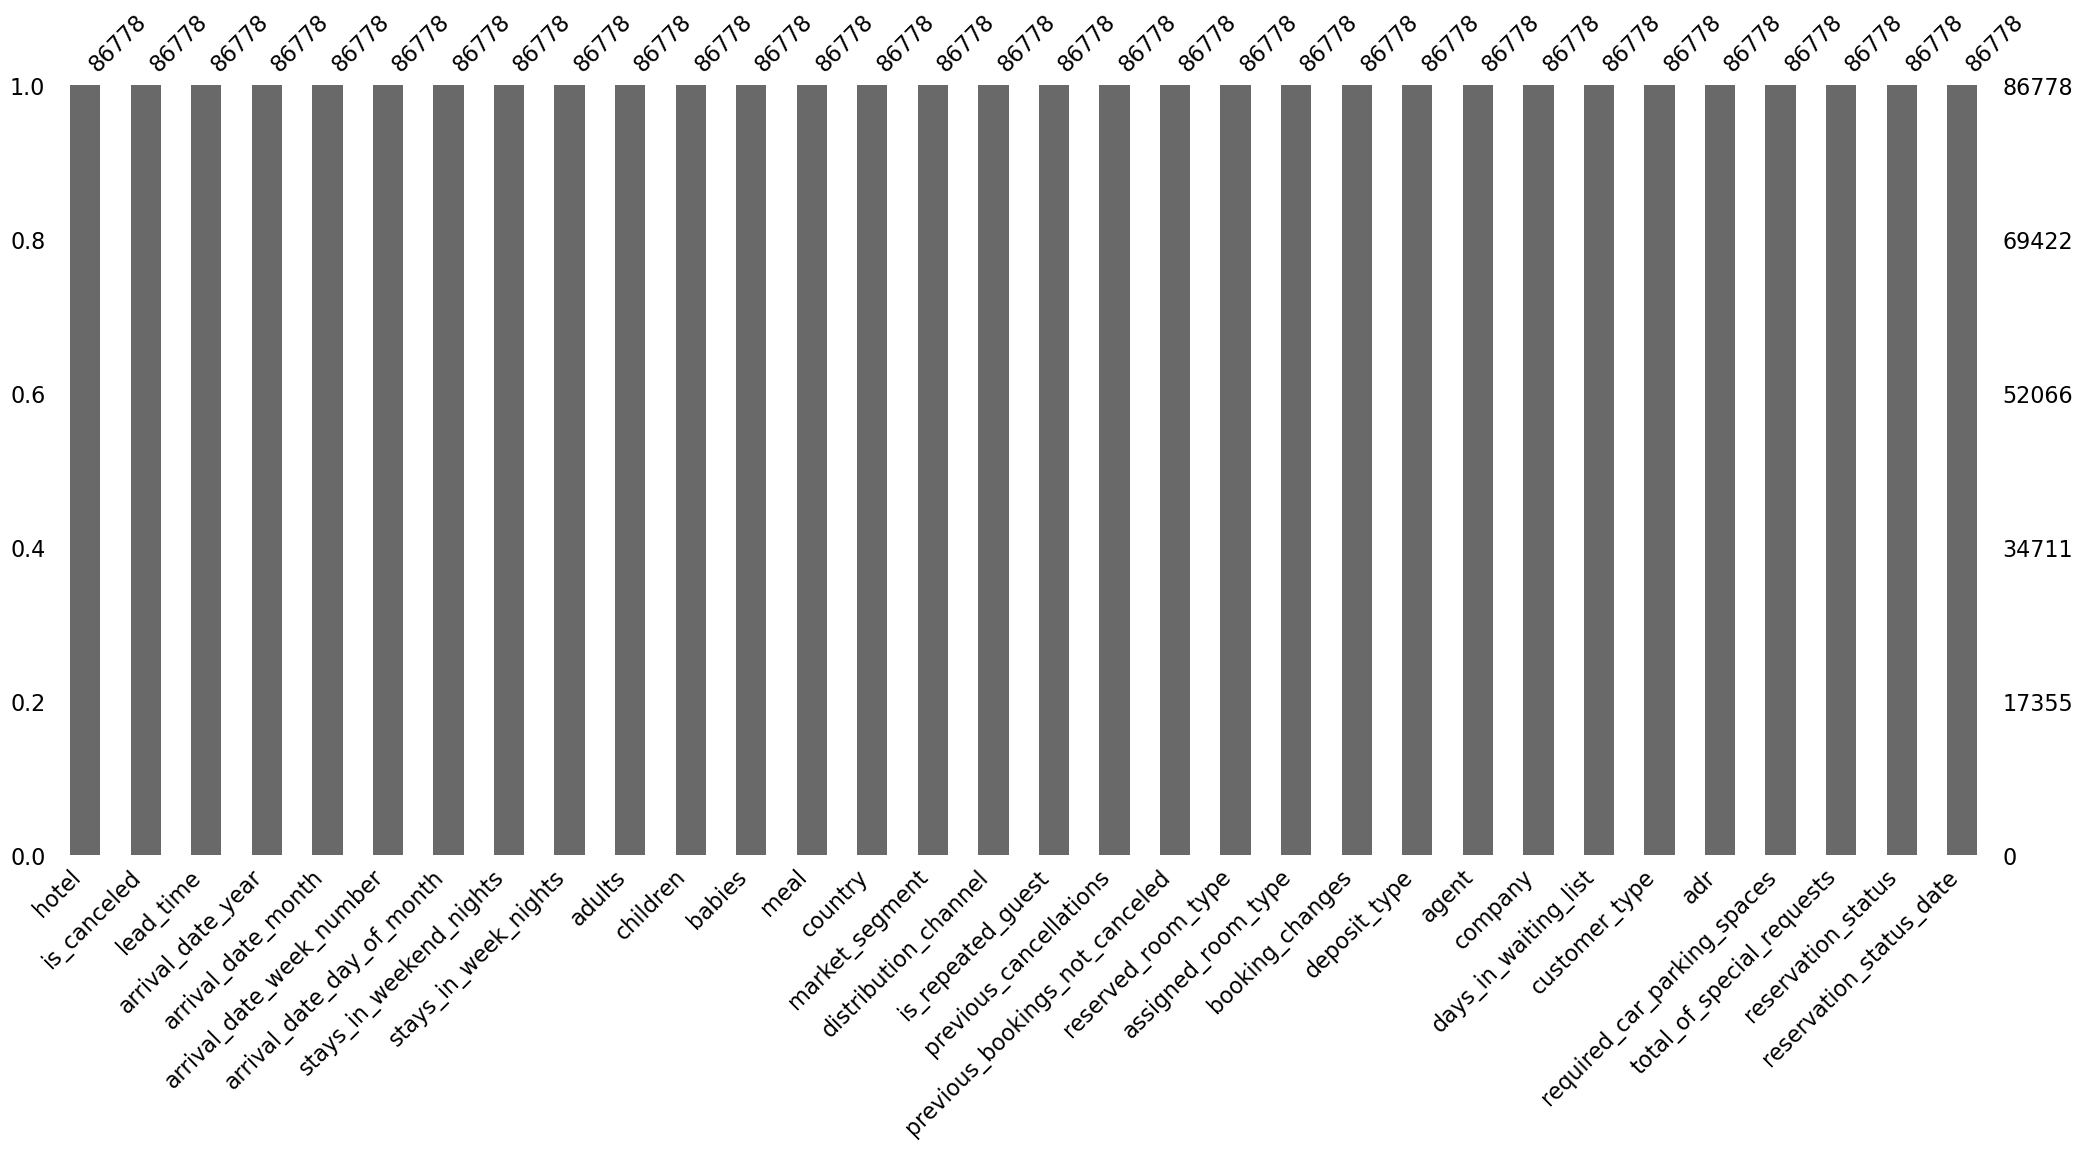

In [829]:
msno.bar(df_cleaned)
plt.show()

### adr

In [830]:
df_cleaned[df_cleaned['adr'] < 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,0.0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,273.0,0,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


In [831]:
df_cleaned[df_cleaned['adr'] == 0] 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
125,Resort Hotel,0,32,2015,July,27,4,0,1,4,0.0,0,FB,PRT,Complementary,Direct,0,0,0,H,H,2,No Deposit,0,0,0,Transient,0.0,0,1,Check-Out,2015-07-05
167,Resort Hotel,0,111,2015,July,28,6,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,H,0,No Deposit,240.0,0,0,Transient,0.0,0,2,Check-Out,2015-07-06
168,Resort Hotel,0,0,2015,July,28,6,0,0,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,H,0,No Deposit,250.0,0,0,Transient,0.0,0,0,Check-Out,2015-07-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118631,City Hotel,0,78,2017,August,34,23,0,0,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,K,7,No Deposit,98.0,0,0,Transient-Party,0.0,0,0,Check-Out,2017-08-23
118762,City Hotel,0,1,2017,August,34,24,0,1,2,1.0,0,BB,PRT,Complementary,Direct,0,0,0,A,D,1,No Deposit,0,0,0,Transient,0.0,0,3,Check-Out,2017-08-25
118963,City Hotel,0,1,2017,August,35,27,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2017-08-27
119102,City Hotel,0,518,2017,August,34,26,2,1,1,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,229.0,0,0,Transient-Party,0.0,0,0,Check-Out,2017-08-29


In [832]:
df_cleaned.drop(index=14969, inplace=True)

## Uji statistik

In [833]:
df_copy = df_cleaned.copy()

numerik = df_copy.select_dtypes(include = 'number')


In [834]:
from scipy.stats import kstest

for kolom in numerik.columns:
    stat, pval = kstest(df_copy[kolom],'norm')
    if pval < 0.05:
        print(f'Distribusi {kolom} tidak normal (Tolak H0)')
    else:
        print(f'Distribusi {kolom} normal (Terima H0)')

Distribusi is_canceled tidak normal (Tolak H0)
Distribusi lead_time tidak normal (Tolak H0)
Distribusi arrival_date_year tidak normal (Tolak H0)
Distribusi arrival_date_week_number tidak normal (Tolak H0)
Distribusi arrival_date_day_of_month tidak normal (Tolak H0)
Distribusi stays_in_weekend_nights tidak normal (Tolak H0)
Distribusi stays_in_week_nights tidak normal (Tolak H0)
Distribusi adults tidak normal (Tolak H0)
Distribusi children tidak normal (Tolak H0)
Distribusi babies tidak normal (Tolak H0)
Distribusi is_repeated_guest tidak normal (Tolak H0)
Distribusi previous_cancellations tidak normal (Tolak H0)
Distribusi previous_bookings_not_canceled tidak normal (Tolak H0)
Distribusi booking_changes tidak normal (Tolak H0)
Distribusi days_in_waiting_list tidak normal (Tolak H0)
Distribusi adr tidak normal (Tolak H0)
Distribusi required_car_parking_spaces tidak normal (Tolak H0)
Distribusi total_of_special_requests tidak normal (Tolak H0)


In [835]:
from statsmodels.stats.diagnostic import lilliefors

for kolom in numerik.columns:
    stat, pval = lilliefors(df_copy[kolom])
    if pval < 0.05:
        print(f'Distribusi {kolom} tidak normal (Tolak H0)')
    else:
        print(f'Distribusi {kolom} normal (Terima H0)')

Distribusi is_canceled tidak normal (Tolak H0)
Distribusi lead_time tidak normal (Tolak H0)
Distribusi arrival_date_year tidak normal (Tolak H0)
Distribusi arrival_date_week_number tidak normal (Tolak H0)
Distribusi arrival_date_day_of_month tidak normal (Tolak H0)
Distribusi stays_in_weekend_nights tidak normal (Tolak H0)
Distribusi stays_in_week_nights tidak normal (Tolak H0)
Distribusi adults tidak normal (Tolak H0)
Distribusi children tidak normal (Tolak H0)
Distribusi babies tidak normal (Tolak H0)
Distribusi is_repeated_guest tidak normal (Tolak H0)
Distribusi previous_cancellations tidak normal (Tolak H0)
Distribusi previous_bookings_not_canceled tidak normal (Tolak H0)
Distribusi booking_changes tidak normal (Tolak H0)
Distribusi days_in_waiting_list tidak normal (Tolak H0)
Distribusi adr tidak normal (Tolak H0)
Distribusi required_car_parking_spaces tidak normal (Tolak H0)
Distribusi total_of_special_requests tidak normal (Tolak H0)


In [836]:
from scipy.stats import normaltest

for kolom in numerik.columns:
    stat, pval = normaltest(df_copy[kolom])
    if pval < 0.05:
        print(f'Distribusi {kolom} tidak normal (Tolak H0)')
    else:
        print(f'Distribusi {kolom} normal (Terima H0)')

Distribusi is_canceled tidak normal (Tolak H0)
Distribusi lead_time tidak normal (Tolak H0)
Distribusi arrival_date_year tidak normal (Tolak H0)
Distribusi arrival_date_week_number tidak normal (Tolak H0)
Distribusi arrival_date_day_of_month tidak normal (Tolak H0)
Distribusi stays_in_weekend_nights tidak normal (Tolak H0)
Distribusi stays_in_week_nights tidak normal (Tolak H0)
Distribusi adults tidak normal (Tolak H0)
Distribusi children tidak normal (Tolak H0)
Distribusi babies tidak normal (Tolak H0)
Distribusi is_repeated_guest tidak normal (Tolak H0)
Distribusi previous_cancellations tidak normal (Tolak H0)
Distribusi previous_bookings_not_canceled tidak normal (Tolak H0)
Distribusi booking_changes tidak normal (Tolak H0)
Distribusi days_in_waiting_list tidak normal (Tolak H0)
Distribusi adr tidak normal (Tolak H0)
Distribusi required_car_parking_spaces tidak normal (Tolak H0)
Distribusi total_of_special_requests tidak normal (Tolak H0)


In [837]:
from scipy.stats import shapiro

stat, pval = shapiro(df_copy['is_canceled'])
if pval < 0.05:
    print('Distribusi tidak normal (Tolak H0)')
else:
    print('Distribusi normal (Terima H0)')

Distribusi tidak normal (Tolak H0)


## Korelasi

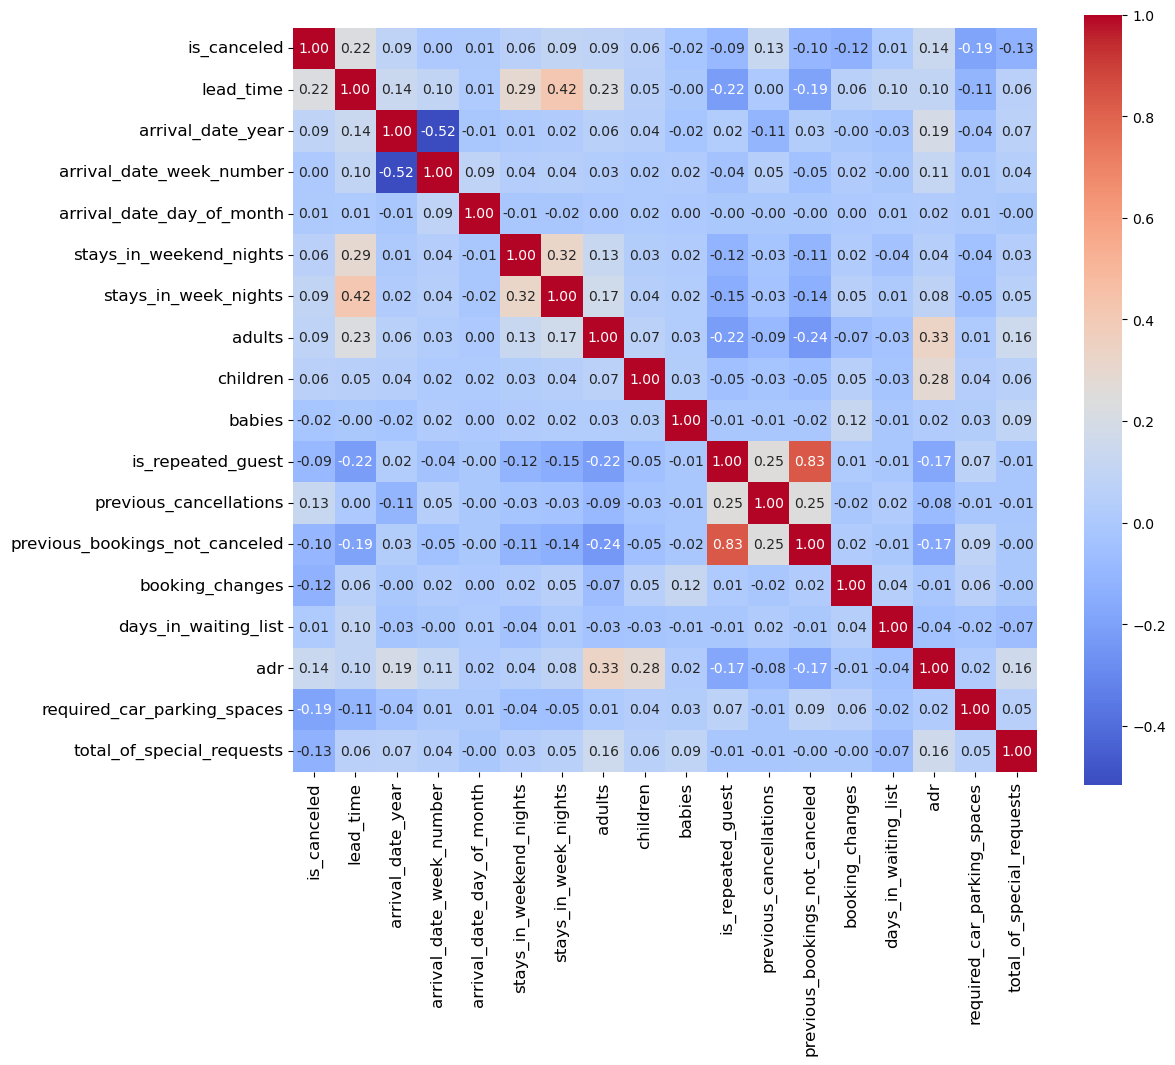

In [838]:
# Memilih kolom numerik
numerik = df_cleaned.select_dtypes(include='number')

# Menghitung matriks korelasi Spearman
correlation_matrix = numerik.corr(method='spearman')

# Mengatur ukuran figure
plt.figure(figsize=(12, 10))

# Membuat heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            cbar=True, square=True, annot_kws={"size": 10}) # Ukuran angka di heatmap

# Mengatur rotasi dan ukuran label sumbu x
plt.xticks(rotation=90, fontsize=12)

# Mengatur ukuran label sumbu y
plt.yticks(fontsize=12)


# Menampilkan plot
plt.show()


### Analisis Heatmap Korelasi Spearman

Heatmap ini menunjukkan korelasi Spearman antar variabel numerik. Korelasi Spearman digunakan karena tidak mengasumsikan data berdistribusi normal dan cocok untuk data ordinal atau data dengan outlier.  Berikut beberapa poin penting:

**Korelasi Kuat (0.6 - 1.0):**

* **`is_repeated_guest` dan `previous_bookings_not_canceled` (0.83):** Korelasi positif yang sangat kuat.  Indikasi kuat bahwa tamu yang *tidak* membatalkan pemesanan sebelumnya cenderung untuk *tidak* membatalkan pemesanan saat ini. Ini mungkin menunjukkan loyalitas pelanggan atau pola pemesanan yang konsisten.

**Korelasi Sedang (0.4 - 0.59):**

* **`stays_in_weekend_nights` dan `stays_in_week_nights` (0.42):** Korelasi positif sedang.  Menunjukkan bahwa tamu yang menginap lebih lama di akhir pekan cenderung juga menginap lebih lama di hari kerja.  Hal ini masuk akal, karena pemesanan yang lebih panjang seringkali mencakup hari kerja dan akhir pekan.

**Korelasi Lemah (0.2 - 0.39):**

* **`is_canceled` dan `lead_time` (0.22):** Korelasi positif lemah.  Menunjukkan sedikit kecenderungan bahwa lead time yang lebih lama dikaitkan dengan pembatalan.  Meskipun korelasinya lemah, ini tetap merupakan insight yang berguna.
* **`adults` dan `stays_in_week_nights` (0.23):** Korelasi positif lemah.  Menunjukkan sedikit hubungan antara jumlah orang dewasa dan lama menginap di hari kerja.
* **`adr` (Average Daily Rate) dan `required_car_parking_spaces` (0.28):** Korelasi positif lemah.  Menunjukkan sedikit kecenderungan bahwa tamu yang membutuhkan tempat parkir mobil memiliki ADR yang sedikit lebih tinggi.
* **`adr` dan `total_of_special_requests` (0.33):** Korelasi positif lemah.  Menunjukkan sedikit kecenderungan bahwa tamu dengan permintaan khusus lebih banyak cenderung memiliki ADR yang sedikit lebih tinggi.

**Korelasi Sangat Lemah atau Tidak Ada Korelasi (0 - 0.19):**

* Sebagian besar variabel lainnya menunjukkan korelasi yang sangat lemah atau tidak ada korelasi sama sekali.  Ini berarti tidak ada hubungan linear yang jelas antara variabel-variabel tersebut.


**Kesimpulan:**

Meskipun ada beberapa korelasi yang menarik, penting untuk diingat bahwa korelasi tidak menyiratkan sebab-akibat.  Analisis lebih lanjut diperlukan untuk memahami faktor-faktor yang mendasari hubungan ini.  Korelasi yang kuat antara `is_repeated_guest` dan `previous_bookings_not_canceled` sangat menarik dan layak untuk diselidiki lebih lanjut.


### Analisis Korelasi is_canceled 

In [839]:
import pandas as pd

# Misalkan df adalah DataFrame Anda yang sudah ada
# Hitung matriks korelasi
correlation_matrix = numerik.corr(method='spearman')

# Ambil korelasi untuk kolom 'is_canceled'
is_canceled_correlation = correlation_matrix['is_canceled']

# Urutkan berdasarkan nilai korelasi
sorted_correlation = is_canceled_correlation.sort_values(ascending=False)

# Tampilkan hasil
print(sorted_correlation)


is_canceled                       1.000000
lead_time                         0.224584
adr                               0.140240
previous_cancellations            0.126243
stays_in_week_nights              0.094562
adults                            0.087041
arrival_date_year                 0.086875
children                          0.060804
stays_in_weekend_nights           0.058738
days_in_waiting_list              0.014982
arrival_date_day_of_month         0.005347
arrival_date_week_number          0.000169
babies                           -0.021418
is_repeated_guest                -0.089249
previous_bookings_not_canceled   -0.100999
booking_changes                  -0.124383
total_of_special_requests        -0.129172
required_car_parking_spaces      -0.185848
Name: is_canceled, dtype: float64


### Interpretasi Angka Korelasi

1. **Korelasi Positif**:
   - **lead_time (0.224563)**: Ada hubungan positif yang moderat antara `lead_time` dan `is_canceled`. Ini berarti semakin lama waktu antara pemesanan dan kedatangan, semakin besar kemungkinan pemesanan dibatalkan.
   - **adr (0.140277)**: Ada hubungan positif yang lemah antara `adr` (Average Daily Rate) dan `is_canceled`. Ini menunjukkan bahwa tarif harian yang lebih tinggi mungkin sedikit berhubungan dengan peningkatan pembatalan.
   - **previous_cancellations (0.126239)**: Hubungan positif yang lemah menunjukkan bahwa jika seorang tamu sebelumnya telah membatalkan, mereka mungkin lebih cenderung membatalkan lagi.

2. **Korelasi Negatif**:
   - **required_car_parking_spaces (-0.185848)**: Ada hubungan negatif yang moderat, menunjukkan bahwa semakin banyak tempat parkir yang dibutuhkan, semakin kecil kemungkinan pemesanan dibatalkan. Ini bisa berarti bahwa tamu yang membutuhkan parkir lebih cenderung untuk tetap melakukan pemesanan.
   - **is_repeated_guest (-0.089274)**: Hubungan negatif yang lemah menunjukkan bahwa tamu yang kembali memiliki kemungkinan lebih kecil untuk membatalkan pemesanan mereka.
   - **total_of_special_requests (-0.129180)**: Hubungan negatif yang lemah menunjukkan bahwa semakin banyak permintaan khusus yang diajukan, semakin kecil kemungkinan pemesanan dibatalkan.

3. **Korelasi Rendah**:
   - Banyak kolom lain menunjukkan korelasi yang sangat rendah atau mendekati nol dengan `is_canceled`, seperti `children`, `arrival_date_day_of_month`, dan `arrival_date_week_number`. Ini menunjukkan bahwa variabel-variabel ini tidak memiliki pengaruh signifikan terhadap kemungkinan pembatalan.

### Kesimpulan
- **Faktor yang Mempengaruhi Pembatalan**: Dari analisis ini, `lead_time`, `adr`, dan `previous_cancellations` adalah faktor yang lebih berpengaruh terhadap pembatalan. Sementara itu, `required_car_parking_spaces` dan `is_repeated_guest` menunjukkan hubungan negatif yang menarik.
- **Strategi Pemasaran dan Manajemen**: Informasi ini dapat digunakan untuk mengembangkan strategi pemasaran dan manajemen yang lebih baik, seperti menawarkan insentif untuk pemesanan lebih awal atau memahami perilaku tamu yang sering membatalkan.

Jika Anda memiliki pertanyaan lebih lanjut atau ingin melakukan analisis tambahan, silakan beri tahu!

## Export CSV

In [840]:
# Export df_cleaned
df_cleaned.to_csv('df_cleaned.csv', index=False)

# EDA

## Overview

buatkan code overview untuk nomor 1

### Analisis Pemesanan

#### Berdasarkan jenis hotel

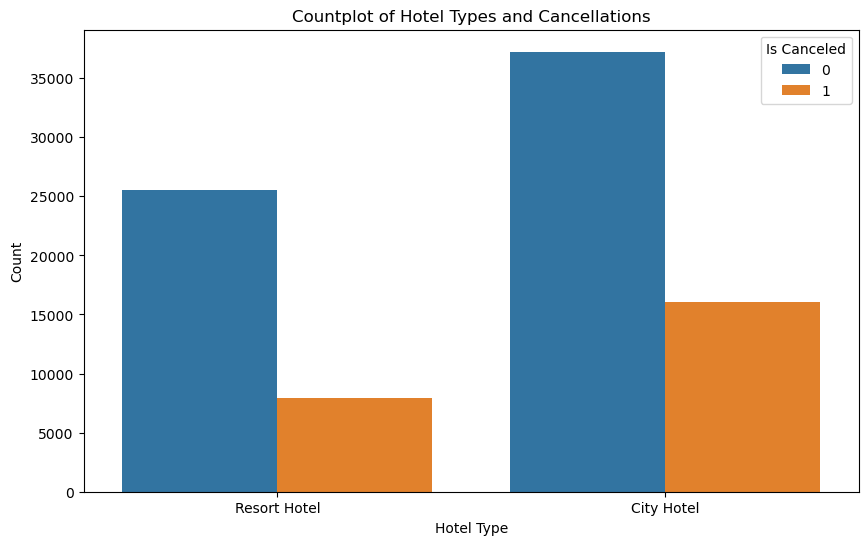

In [841]:
# Create countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='hotel', hue='is_canceled')
plt.title('Countplot of Hotel Types and Cancellations')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.legend(title='Is Canceled')
plt.show()